# **Análise de dados (Pandas)**

---


**Atividade análise de dados 7º Semestre** 

Universidade 9 de Julho

# **Nomes e RAs**

Gustavo Borges Galdino da Silva - 317203137

Lucas da Rocha Gomes - 418104311

Rodrigo Takeshi Shimizu - 418107522

Vinicius do Santos Andrade - 418104967

Yuri Santana Cordeiro - 3018101849

# **Importando o Pandas**

In [ ]:
import pandas as pd

# **Importação e Verificação dos dados**

In [ ]:
steam_games = pd.read_csv('SteamCharts.csv', encoding= 'unicode_escape')

In [ ]:
type(steam_games)

pandas.core.frame.DataFrame

In [ ]:
steam_games.info

<bound method DataFrame.info of                                gamename  year  ...     peak  avg_peak_perc
0      Counter-Strike: Global Offensive  2021  ...  1123485       65.9567%
1      Counter-Strike: Global Offensive  2021  ...  1124553       66.0893%
2      Counter-Strike: Global Offensive  2020  ...  1164396        61.646%
3      Counter-Strike: Global Offensive  2020  ...  1037464       64.4605%
4      Counter-Strike: Global Offensive  2020  ...   943876       65.0156%
...                                 ...   ...  ...      ...            ...
83784       Steel Division: Normandy 44  2017  ...      987       42.7153%
83785       Steel Division: Normandy 44  2017  ...     2584       35.0906%
83786       Steel Division: Normandy 44  2017  ...     4606       24.7212%
83787       Steel Division: Normandy 44  2017  ...     1911       37.8362%
83788       Steel Division: Normandy 44  2017  ...       14       20.2857%

[83789 rows x 7 columns]>

In [ ]:
steam_games.shape

(83789, 7)

In [ ]:
steam_games.columns

Index(['gamename', 'year', 'month', 'avg', 'gain', 'peak', 'avg_peak_perc'], dtype='object')

In [ ]:
steam_games.head(3)

,gamename,year,month,avg,gain,peak,avg_peak_perc
0,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1123485,65.9567%
1,Counter-Strike: Global Offensive,2021,January,743209.66,25405.91,1124553,66.0893%
2,Counter-Strike: Global Offensive,2020,December,717803.75,49049.17,1164396,61.646%


In [ ]:
steam_games.tail(3)

,gamename,year,month,avg,gain,peak,avg_peak_perc
83786,Steel Division: Normandy 44,2017,May,1138.66,415.61,4606,24.7212%
83787,Steel Division: Normandy 44,2017,April,723.05,720.21,1911,37.8362%
83788,Steel Division: Normandy 44,2017,March,2.84,NaN,14,20.2857%


# **Manipulação de dados não utilizáveis**

Este dataset possui um campo de porcentagem representativa do pico de jogadores em relação à média de jogadores. Em análise do grupo, foi decidido tirar essa coluna já que acreditamos que não terá valor representativo dentro do projeto.

In [ ]:
steam_games = steam_games.fillna(0)

In [ ]:
steam_games.shape

(83789, 7)

In [ ]:
steam_games.drop('avg_peak_perc', axis=1, inplace=True)

In [ ]:
steam_games.shape

(83789, 6)

In [ ]:
steam_games.columns

Index(['gamename', 'year', 'month', 'avg', 'gain', 'peak'], dtype='object')

# **Ordenação dos dados**

Uma vez com os dados limpos, salvamos uma cópia do mesmo e ordenamos eles decrescentemente de ganho de jogadores no mês. Foram feitas mudanças na parte do mês ("month") onde renomeados para facilitar ordenação. 

In [ ]:
steam_games.sort_values(by='gain',ascending=False)

,gamename,year,month,avg,gain,peak
248,PLAYERUNKNOWN'S BATTLEGROUNDS,2017,October,1086638.87,426446.12,2390946
249,PLAYERUNKNOWN'S BATTLEGROUNDS,2017,September,660192.74,270665.33,1550463
247,PLAYERUNKNOWN'S BATTLEGROUNDS,2017,November,1334170.09,247531.23,2915723
10,Counter-Strike: Global Offensive,2020,April,857604.22,186570.94,1305714
250,PLAYERUNKNOWN'S BATTLEGROUNDS,2017,August,389527.42,159825.72,874171
...,...,...,...,...,...,...
3334,Fallout 4,2015,December,94136.37,-132161.46,201635
242,PLAYERUNKNOWN'S BATTLEGROUNDS,2018,April,1107181.80,-188226.79,2456361
244,PLAYERUNKNOWN'S BATTLEGROUNDS,2018,February,1391015.30,-193871.48,2934761
241,PLAYERUNKNOWN'S BATTLEGROUNDS,2018,May,876180.64,-231001.16,2175704


In [ ]:
steam_games.to_csv('steamgames_limpo.csv', index=None)

In [ ]:
steam_games_clean = pd.read_csv('steamgames_limpo.csv', encoding= 'unicode_escape')

In [ ]:
steam_games_clean.shape

(83789, 6)

In [ ]:
steam_games_clean['month'] = steam_games_clean['month'].str.replace('January', '01 (January)')
steam_games_clean['month'] = steam_games_clean['month'].str.replace('February', '02 (February)')
steam_games_clean['month'] = steam_games_clean['month'].str.replace('March', '03 (March)')
steam_games_clean['month'] = steam_games_clean['month'].str.replace('April', '04 (April)')
steam_games_clean['month'] = steam_games_clean['month'].str.replace('May', '05 (May)')
steam_games_clean['month'] = steam_games_clean['month'].str.replace('June', '06 (June)')
steam_games_clean['month'] = steam_games_clean['month'].str.replace('July', '07 (July)')
steam_games_clean['month'] = steam_games_clean['month'].str.replace('August', '08 (August)')
steam_games_clean['month'] = steam_games_clean['month'].str.replace('September', '09 (September)')
steam_games_clean['month'] = steam_games_clean['month'].str.replace('October', '10 (October)')
steam_games_clean['month'] = steam_games_clean['month'].str.replace('November', '11 (November)')
steam_games_clean['month'] = steam_games_clean['month'].str.replace('December', '12 (December)')

In [ ]:
steam_games_clean['month'].head(10)

0     02 (February) 
1      01 (January) 
2     12 (December) 
3     11 (November) 
4      10 (October) 
5    09 (September) 
6       08 (August) 
7         07 (July) 
8         06 (June) 
9          05 (May) 
Name: month, dtype: object

In [ ]:
steam_games_clean['gamename'] = steam_games_clean['gamename'].str.replace("PLAYERUNKNOWN'S BATTLEGROUNDS", 'PUBG')
steam_games_clean['gamename'] = steam_games_clean['gamename'].str.replace("Counter-Strike: Global Offensive", 'CSGO')
steam_games_clean['gamename'] = steam_games_clean['gamename'].str.replace("Grand Theft Auto V", 'GTAV')

In [ ]:
steam_games_clean.sort_values(by='gain',ascending=False)

,gamename,year,month,avg,gain,peak
248,PUBG,2017,10 (October),1086638.87,426446.12,2390946
249,PUBG,2017,09 (September),660192.74,270665.33,1550463
247,PUBG,2017,11 (November),1334170.09,247531.23,2915723
10,CSGO,2020,04 (April),857604.22,186570.94,1305714
250,PUBG,2017,08 (August),389527.42,159825.72,874171
...,...,...,...,...,...,...
3334,Fallout 4,2015,12 (December),94136.37,-132161.46,201635
242,PUBG,2018,04 (April),1107181.80,-188226.79,2456361
244,PUBG,2018,02 (February),1391015.30,-193871.48,2934761
241,PUBG,2018,05 (May),876180.64,-231001.16,2175704


In [ ]:
steam_games_clean.to_csv('steamgames_limpo.csv', index=None)

# **Insights**

# **Exploração de dados**

In [ ]:
steam_games_clean = steam_games_clean.sort_values(by='year',ascending=False)

In [ ]:
steam_games_clean['year'].unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012])

Verificamos que os dados contém dados de todos os anos desde 2012 a 2021

In [ ]:
steam_games_clean['gamename'].value_counts()

Far Cry                                                                     104
Age of EmpiresÂ® III (2007)                                                 104
Botanicula                                                                  104
Mount & Blade                                                               104
Braid                                                                       104
                                                                           ... 
Timberborn Demo                                                               2
Home Behind 2                                                                 2
CosmicBreak Universal                                                         2
Dyson Sphere Program                                                          2
<U+4E09><U+56FD><U+7FA4><U+82F1><U+4F20>8 Heroes of the Three Kingdoms 8      2
Name: gamename, Length: 1260, dtype: int64

Aqui vemos quantas vezes os jogos apareceram na lista

In [ ]:
steam_games_clean.describe()

,year,avg,gain,peak
count,83789.000000,8.378900e+04,83789.000000,8.378900e+04
mean,2017.338708,2.792017e+03,-10.091488,5.518877e+03
std,2.237587,2.648480e+04,3761.339767,5.015571e+04
min,2012.000000,0.000000e+00,-250248.990000,0.000000e+00
25%,2016.000000,5.325000e+01,-37.060000,1.380000e+02
50%,2018.000000,2.042700e+02,-1.310000,5.020000e+02
75%,2019.000000,7.716500e+02,21.280000,1.741000e+03
max,2021.000000,1.584887e+06,426446.120000,3.236027e+06


A visão geral dos dados. Uma curiosidade que ele nos trás é que a média de ganho de jogadores é negativa, o que indica que em média os jogos perdem mais jogadores do que ganham.

In [ ]:
steam_games_clean.sort_values(by='gain',ascending=True).head(30)

,gamename,year,month,avg,gain,peak
1562,Cyberpunk 2077,2021,01 (January),82146.66,-250248.99,225670
241,PUBG,2018,05 (May),876180.64,-231001.16,2175704
244,PUBG,2018,02 (February),1391015.30,-193871.48,2934761
242,PUBG,2018,04 (April),1107181.80,-188226.79,2456361
3334,Fallout 4,2015,12 (December),94136.37,-132161.46,201635
239,PUBG,2018,07 (July),688620.42,-112047.81,1350463
26046,Monster Hunter: World,2018,09 (September),88575.17,-99716.06,227644
520,GTAV,2015,05 (May),93361.62,-99352.39,215966
169,Dota 2,2015,09 (September),508156.85,-98787.12,888728
8,CSGO,2020,06 (June),671647.46,-97147.79,1009467


Podemos ver que muitos jogos perdem jogadores de forma massiva quando eles os perdem.

In [ ]:
steam_games_clean.sort_values(by='gain',ascending=False).head(30)

,gamename,year,month,avg,gain,peak
248,PUBG,2017,10 (October),1086638.87,426446.12,2390946
249,PUBG,2017,09 (September),660192.74,270665.33,1550463
247,PUBG,2017,11 (November),1334170.09,247531.23,2915723
10,CSGO,2020,04 (April),857604.22,186570.94,1305714
250,PUBG,2017,08 (August),389527.42,159825.72,874171
245,PUBG,2018,01 (January),1584886.77,148728.26,3236027
11,CSGO,2020,03 (March),671033.29,127054.13,1145972
3708,Mount & Blade II: Bannerlord,2020,04 (April),113492.99,113492.74,248034
3763,Total War: THREE KINGDOMS,2019,05 (May),102719.07,102719.01,191816
246,PUBG,2017,12 (December),1436158.51,101988.42,3080769


O ganho de jogadores tende a favorecer jogos que tem uma base de jogadores que já é grande.

In [ ]:
steam_games_clean.groupby('gamename').median().sort_values(by='gain',ascending=False).head(30)

,year,avg,gain,peak
gamename,,,,
Dota 2,2016.0,475924.040,7884.170,826109.5
CSGO,2016.0,342028.480,3779.315,612511.0
Apex Legends,2020.5,73362.000,3648.495,123560.5
Dyson Sphere Program,2021.0,28667.720,3142.785,59291.0
Football Manager 2021,2020.5,52569.590,2207.975,90592.0
Tom Clancy's Rainbow Six Siege,2018.0,63092.810,1518.100,116054.0
NBA 2K21,2020.0,9476.800,964.820,17402.0
Gunfire Reborn,2020.0,3555.645,759.330,7453.0
Dead by Daylight,2018.0,19176.790,479.350,38177.0


In [ ]:
steam_games_clean.groupby('gamename').median().sort_values(by='avg',ascending=False).head(30)

,year,avg,gain,peak
gamename,,,,
Dota 2,2016.0,475924.040,7884.170,826109.5
PUBG,2019.0,355709.920,-8351.275,748450.5
CSGO,2016.0,342028.480,3779.315,612511.0
Cyberpunk 2077,2021.0,82146.660,-57441.830,225670.0
Apex Legends,2020.5,73362.000,3648.495,123560.5
Destiny 2,2020.0,66219.640,-9110.480,122236.0
Tom Clancy's Rainbow Six Siege,2018.0,63092.810,1518.100,116054.0
GTAV,2018.0,55410.520,-500.100,112074.0
Football Manager 2021,2020.5,52569.590,2207.975,90592.0


As medianas de média de jogadores e ganho de jogadores não possuem muita relação. A mediana de ganhos pode indicar que jogos menos 

# **Verificando médias dos anos**

In [ ]:
steam_games_clean.groupby('year').mean()

,avg,gain,peak
year,,,
2012,1857.176512,-68.521067,3914.659649
2013,2049.903427,65.856604,4339.295792
2014,2545.695657,40.149232,5218.345246
2015,2782.385191,-20.615418,5569.266234
2016,2629.729685,-41.709884,5153.279176
2017,2843.182719,117.416406,5635.775299
2018,3014.045170,-111.800034,6189.291110
2019,2559.648512,-37.350136,5002.182984
2020,3158.675927,-3.012723,5988.573398


A média de jogadores por mês indica que o ano de 2020, provavelmente devido à pandemia de COVID-19, viu um crescimento massivo de jogadores comparado ao ano anterior, que teve uma queda consideravel desde 2018.

In [ ]:
steam_games_clean.groupby(['gamename','year']).mean().sort_values(by='avg',ascending=False).head(30)

avg           gain          peak
gamename        year                                            
PUBG            2018  855560.980000  -80218.104167  1.845250e+06
CSGO            2021  742111.450000   11604.745000  1.124019e+06
                2020  657265.765000   21758.515833  1.024596e+06
Dota 2          2016  638267.885000    1714.695000  1.114353e+06
                2015  561580.041667    4116.994167  9.841637e+05
PUBG            2017  547107.929000  141860.739000  1.195796e+06
Dota 2          2017  533029.240000   -6737.190000  9.092321e+05
                2019  477650.640000   -4599.006667  8.501205e+05
                2014  474744.562500   13111.152500  8.180121e+05
                2018  454786.681667   -6142.209167  7.828986e+05
                2020  433340.379167    3197.713333  7.111618e+05
                2021  418751.890000   -8860.095000  6.731140e+05
CSGO            2019  398361.112500    5099.360000  6.696914e+05
                2017  369258.907500    -109.901667  6.704216e+05
PUBG            2019  368058.510000  -13757.983333  7.978862e+05
CSGO            2016  349814.875000   -2937.618333  6.722739e+05
Cyberpunk 2077  2020  332395.650000       0.000000  8.303870e+05
CSGO            2018  321531.070833    4552.697500  5.662415e+05
                2015  319942.058333   16154.802500  6.483591e+05
Dota 2          2013  250041.650833   20390.171667  4.418228e+05
PUBG            2020  215206.369167   -9934.323333  5.340012e+05
                2021  200102.355000    4861.970000  4.496940e+05
Fallout 4       2015  160217.100000  -66080.730000  3.367950e+05
Rust            2021  129929.760000   28285.310000  2.343350e+05
Destiny 2       2019  121811.523333  -24378.946667  2.087713e+05
CSGO            2014  105695.496667   11400.101667  2.127253e+05
GTAV            2020  102378.855000     761.381667  1.946011e+05
Apex Legends    2021   96374.690000   28256.445000  1.633635e+05
GTAV            2021   95949.115000   -8133.315000  1.656895e+05
Team Fortress 2 2021   92189.540000    9403.700000  1.223610e+05

Nessa agrupação percebe-se que PUBG teve um crescimento explosivo e uma queda tão rápida quanto, enquanto outros jogos como Dota 2 e CSGO tem uma certa estabilidade.

In [ ]:
steam_games_clean.groupby(['gamename','year']).median().sort_values(by='avg',ascending=False).head(30)

avg       gain       peak
gamename        year                                  
PUBG            2018  744644.325 -76112.925  1550339.5
CSGO            2021  742111.450  11604.745  1124019.0
                2020  654356.120  28420.000   993618.0
Dota 2          2016  638783.895   3827.470  1090096.0
                2015  563476.325  15689.740   938788.5
                2017  544356.735 -10197.380   898856.5
                2014  486635.565  20465.095   838084.5
                2019  471447.645  -7695.690   846032.0
                2018  451393.915  -8275.870   778963.0
                2020  427810.975  -4303.420   712217.0
                2021  418751.890  -8860.095   673114.0
CSGO            2019  397574.850   9142.500   667070.0
                2017  374406.865   -302.325   652669.5
PUBG            2019  360807.165 -15170.535   748450.5
CSGO            2016  344712.475  -3831.140   662222.5
                2015  336844.195  20136.830   644051.0
Cyberpunk 2077  2020  332395.650      0.000   830387.0
CSGO            2018  317996.625   2558.965   555999.5
PUBG            2017  309614.560  95893.940   677731.0
Dota 2          2013  224012.450  18464.425   374388.5
PUBG            2020  220083.735 -15353.880   507963.5
                2021  200102.355   4861.970   449694.0
Fallout 4       2015  160217.100 -66080.730   336795.0
Rust            2021  129929.760  28285.310   234335.0
Destiny 2       2019  107955.770 -15784.790   195407.0
GTAV            2020  103333.560   7134.475   194897.5
Apex Legends    2021   96374.690  28256.445   163363.5
GTAV            2021   95949.115  -8133.315   165689.5
CSGO            2014   95531.510   8788.140   181875.0
Team Fortress 2 2021   92189.540   9403.700   122361.0

As médias e a medianas apresentam um resultado muito semelhante.

In [ ]:
steam_games_clean.groupby(['gamename','year']).std().sort_values(by='gain',ascending=False).head(30)

avg           gain          peak
gamename                     year                                            
Cyberpunk 2077               2021   40617.500446  136335.250297  1.262575e+05
PUBG                         2017  548403.634878  135135.016261  1.199129e+06
                             2018  398524.851815  104631.895775  8.369360e+05
Fallout 4                    2015   93452.264578   93452.264578  1.911451e+05
CSGO                         2020   95196.016433   82725.481080  1.486966e+05
Rust                         2021   17235.713649   74472.896317  1.422557e+04
Dota 2                       2015   34987.576211   51069.934554  1.237305e+05
Mount & Blade II: Bannerlord 2020   33867.085308   49842.229791  7.619769e+04
Total War: THREE KINGDOMS    2019   33854.155077   45409.084255  6.590326e+04
Dota 2                       2019   69422.645434   44583.331023  1.200214e+05
Monster Hunter: World        2018   65430.598807   43911.838786  9.822744e+04
Dota 2                       2016   34834.901637   42543.987326  8.597648e+04
CSGO                         2018   48182.793845   39823.953607  1.164578e+05
Dota 2                       2017   40528.816642   37140.209847  7.284370e+04
GTAV                         2015   53845.873259   35102.202097  1.043896e+05
Stardew Valley               2021   13337.349112   32815.206440  2.458610e+04
Terraria                     2020   30913.280171   31627.892873  1.279457e+05
Monster Hunter: World        2020   31272.111455   30681.263708  7.778671e+04
Apex Legends                 2021   34800.896632   29641.145521  4.728494e+04
Destiny 2                    2019   38486.825884   29626.154938  7.772703e+04
Dota 2                       2018   20295.992736   29305.756580  4.397522e+04
                             2014   50422.020912   28007.151517  9.332875e+04
                             2021   19685.513377   26840.960241  3.040418e+04
                             2013   81247.723556   26317.900629  1.616368e+05
Destiny 2                    2021   10273.646348   25925.985279  3.701704e+04
Fall Guys: Ultimate Knockout 2020   47714.811079   25836.042564  6.840270e+04
Path of Exile                2021     541.438733   25281.676651  4.705937e+04
PUBG                         2019   62190.594389   25051.489332  1.352002e+05
Dota 2                       2020   33415.349572   25020.268222  5.359677e+04
PAYDAY 2                     2017   22439.851531   23738.976496  6.328811e+04

Existe grande dispersão de valores de ganho de jogadores

# **Separando dados para melhor analise**
Nessa parte do projeto, separamos os 5 jogos mais populares do dataset para gerarmos alguns dados baseado nisso. Foi também feita algumas mudanças nos nomes dos jogos, para o uso popular, como "Counter strike Global Offensive" para "CSGO" ...

In [ ]:
game_csgo = steam_games_clean.where(steam_games_clean['gamename'] == 'CSGO')
game_csgo = game_csgo.sort_values(by='month',ascending=False)
game_csgo = game_csgo.dropna()
game_csgo = game_csgo.reset_index()
game_csgo.drop('index', axis=1, inplace=True)
game_csgo.sort_values(by='year',ascending=False)

,gamename,year,month,avg,gain,peak
88,CSGO,2021.0,02 (February),741013.24,-2196.42,1123485.0
101,CSGO,2021.0,01 (January),743209.66,25405.91,1124553.0
52,CSGO,2020.0,07 (July),625900.81,-45746.65,857560.0
34,CSGO,2020.0,09 (September),606850.32,-33107.34,977769.0
78,CSGO,2020.0,03 (March),671033.29,127054.13,1145972.0
15,CSGO,2020.0,11 (November),668754.58,55087.89,1037464.0
68,CSGO,2020.0,05 (May),768795.25,-88808.97,1193359.0
86,CSGO,2020.0,02 (February),543979.15,42783.15,916996.0
24,CSGO,2020.0,10 (October),613666.69,6816.37,943876.0
61,CSGO,2020.0,06 (June),671647.46,-97147.79,1009467.0


In [ ]:
game_csgo.groupby('month').mean().sort_values(by='gain')

,year,avg,gain,peak
month,,,,
05 (May),2016.5,315859.102500,-15803.542500,562386.000000
06 (June),2016.5,310378.123750,-5480.978750,502427.250000
09 (September),2016.0,284276.395556,-3767.991111,515680.333333
07 (July),2016.0,275716.996667,-278.288889,433547.444444
10 (October),2016.0,284272.550000,-3.845556,514061.444444
02 (February),2017.0,348286.435556,4714.664444,608342.777778
11 (November),2016.0,289708.561111,5436.011111,538716.555556
08 (August),2016.0,288044.386667,12327.391111,491324.555556
04 (April),2016.5,331662.646250,14665.273750,594245.500000


Notamos que CSGO geralmente ganha jogadores entre o fim e o começo do ano, mas no meio do ano tende a perder jogadores.

In [ ]:
game_pubg = steam_games_clean.where(steam_games_clean['gamename'] == 'PUBG')
game_pubg = game_pubg.sort_values(by='month',ascending=False)
game_pubg = game_pubg.dropna()
game_pubg = game_pubg.reset_index()
game_pubg.drop('index', axis=1, inplace=True)
game_pubg.sort_values(by='year',ascending=False)

,gamename,year,month,avg,gain,peak
45,PUBG,2021.0,01 (January),201247.19,12013.61,451998.0
43,PUBG,2021.0,02 (February),198957.52,-2289.67,447390.0
47,PUBG,2020.0,01 (January),275363.04,-33082.41,645414.0
11,PUBG,2020.0,10 (October),162585.64,-6508.07,381079.0
27,PUBG,2020.0,06 (June),230329.74,-12929.04,546359.0
33,PUBG,2020.0,04 (April),242847.28,14380.11,913075.0
21,PUBG,2020.0,07 (July),211700.30,-18629.44,469568.0
17,PUBG,2020.0,08 (August),192492.61,-19207.70,443390.0
39,PUBG,2020.0,03 (March),228467.17,-29117.16,562028.0
12,PUBG,2020.0,09 (September),169093.71,-23398.90,403693.0


In [ ]:
game_pubg.groupby('month').mean().sort_values(by='gain')

,year,avg,gain,peak
month,,,,
02 (February),2019.5,571379.0600,-68446.0050,1230148.50
05 (May),2018.5,403180.4025,-49300.8300,933969.00
04 (April),2018.5,452481.2400,-37328.6125,1098948.75
03 (March),2018.5,489809.8525,-36217.6150,1090137.50
06 (June),2018.5,383495.8950,-19684.5100,827432.25
07 (July),2018.5,370727.8250,-12768.0675,761636.50
08 (August),2018.5,389967.8675,19240.0425,832349.00
09 (September),2018.5,420834.4525,30866.5850,935062.25
01 (January),2019.5,639825.0625,37980.3625,1354511.25


PUBG tende a ganhar mais jogadores apenas no fim do ano.

In [ ]:
game_dota2 = steam_games_clean.where(steam_games_clean['gamename'] == 'Dota 2')
game_dota2 = game_dota2.sort_values(by='month',ascending=False)
game_dota2 = game_dota2.dropna()
game_dota2 = game_dota2.reset_index()
game_dota2.drop('index', axis=1, inplace=True)
game_dota2.sort_values(by='year',ascending=False)

,gamename,year,month,avg,gain,peak
103,Dota 2,2021.0,01 (January),432671.65,10119.33,694613.0
91,Dota 2,2021.0,02 (February),404832.13,-27839.52,651615.0
16,Dota 2,2020.0,11 (November),425904.83,19543.48,711824.0
102,Dota 2,2020.0,01 (January),378925.43,-5254.32,616415.0
88,Dota 2,2020.0,02 (February),405978.65,27053.22,663812.0
...,...,...,...,...,...,...
23,Dota 2,2012.0,10 (October),75965.44,14097.77,171860.0
39,Dota 2,2012.0,08 (August),55768.61,3047.56,108689.0
17,Dota 2,2012.0,11 (November),101077.43,25111.99,169631.0
1,Dota 2,2012.0,12 (December),121924.42,20846.99,213521.0


In [ ]:
game_dota2.groupby('month').mean().sort_values(by='gain')

,year,avg,gain,peak
month,,,,
09 (September),2016.0,419059.284444,-34250.978889,731452.111111
07 (July),2016.0,430655.975556,-11489.154444,705749.333333
03 (March),2016.5,480531.687500,-10410.703750,879631.250000
04 (April),2016.5,470461.282500,-10070.402500,819447.625000
06 (June),2016.5,490823.138750,-3609.696250,810996.500000
10 (October),2016.0,417183.433333,-1875.852222,747558.222222
12 (December),2016.0,437656.702222,6746.408889,762565.444444
11 (November),2016.0,430910.290000,13726.858889,766078.333333
01 (January),2017.0,451863.892222,14207.191111,770685.000000


Não conseguimos notar um padrão para crescimento do Dota 2, não está relacionado à época do ano.

In [ ]:
game_gtav = steam_games_clean.where(steam_games_clean['gamename'] == 'GTAV')
game_gtav = game_gtav.sort_values(by='month',ascending=False)
game_gtav = game_gtav.dropna()
game_gtav = game_gtav.reset_index()
game_gtav.drop('index', axis=1, inplace=True)
game_gtav.sort_values(by='year',ascending=False)

,gamename,year,month,avg,gain,peak
70,GTAV,2021.0,01 (January),101250.59,-5663.68,184941.0
62,GTAV,2021.0,02 (February),90647.64,-10602.95,146438.0
17,GTAV,2020.0,10 (October),67193.03,-854.00,128578.0
69,GTAV,2020.0,01 (January),111300.20,13522.51,214796.0
64,GTAV,2020.0,02 (February),142724.48,31424.28,267360.0
...,...,...,...,...,...,...
1,GTAV,2015.0,12 (December),43874.72,9408.88,84558.0
29,GTAV,2015.0,08 (August),30918.06,-6739.01,50693.0
15,GTAV,2015.0,10 (October),30924.76,5536.95,73902.0
48,GTAV,2015.0,04 (April),192714.01,0.00,360761.0


In [ ]:
game_dota2.groupby('month').mean().sort_values(by='gain')

,year,avg,gain,peak
month,,,,
09 (September),2016.0,419059.284444,-34250.978889,731452.111111
07 (July),2016.0,430655.975556,-11489.154444,705749.333333
03 (March),2016.5,480531.687500,-10410.703750,879631.250000
04 (April),2016.5,470461.282500,-10070.402500,819447.625000
06 (June),2016.5,490823.138750,-3609.696250,810996.500000
10 (October),2016.0,417183.433333,-1875.852222,747558.222222
12 (December),2016.0,437656.702222,6746.408889,762565.444444
11 (November),2016.0,430910.290000,13726.858889,766078.333333
01 (January),2017.0,451863.892222,14207.191111,770685.000000


Não conseguimos notar um padrão para crescimento do GTAV, porém aparenta ter grandes perdas nos períodos do meio para o fim do ano.

In [ ]:
game_RL = steam_games_clean.where(steam_games_clean['gamename'] == 'Rocket League')
game_RL = game_RL.sort_values(by='month',ascending=False)
game_RL = game_RL.dropna()
game_RL = game_RL.reset_index()
game_RL.drop('index', axis=1, inplace=True)
game_RL.sort_values(by='year',ascending=False)

,gamename,year,month,avg,gain,peak
68,Rocket League,2021.0,01 (January),59449.16,-6315.92,112482.0
58,Rocket League,2021.0,02 (February),53723.01,-5726.15,103429.0
41,Rocket League,2020.0,06 (June),41136.60,-4478.95,72502.0
27,Rocket League,2020.0,08 (August),41201.98,-691.28,70357.0
1,Rocket League,2020.0,12 (December),65765.07,-1785.32,135714.0
...,...,...,...,...,...,...
22,Rocket League,2015.0,09 (September),17439.88,-1704.46,34391.0
14,Rocket League,2015.0,10 (October),16709.27,-730.61,32204.0
6,Rocket League,2015.0,11 (November),16276.41,-432.86,37175.0
3,Rocket League,2015.0,12 (December),20397.42,4121.01,44875.0


In [ ]:
game_RL.groupby('month').mean().sort_values(by='gain')

,year,avg,gain,peak
month,,,,
05 (May),2018.0,33369.926000,-2795.030000,71157.400000
11 (November),2017.5,34870.796667,-2604.536667,67458.500000
02 (February),2018.5,36258.090000,-1691.365000,70067.500000
08 (August),2017.5,30000.671667,-1420.786667,53370.833333
01 (January),2018.5,37949.451667,-821.138333,72450.166667
06 (June),2017.5,27909.163333,100.571667,54258.833333
03 (March),2018.0,33877.524000,1112.420000,72831.200000
04 (April),2018.0,36164.952000,2287.430000,79392.800000
09 (September),2017.5,33463.543333,3462.871667,77706.333333


Não conseguimos notar um padrão para crescimento do Rocket League

# **Gráficos**

# **Jogo a Jogo**
Os graficos jogo a jogo representam a média de jogadores ao longo dos anos e os ganhos de novos jogadores (ou perda dos antigos para número negativos) em cada jogo, distribuidos ao longo do ano. Lembrando que os jogos representados nesses gráficos são os mesmo que foram separados na parte "Separando dados para melhor analise"


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

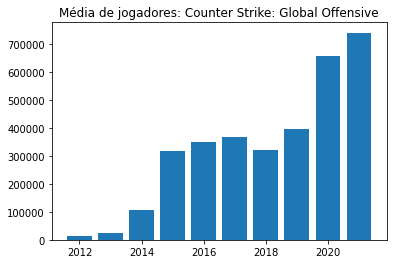

In [ ]:
cyl_grouped = game_csgo.groupby('year').mean().reset_index()

plt.bar(cyl_grouped['year'], cyl_grouped['avg'])
plt.title('Média de jogadores: Counter Strike: Global Offensive')
plt.show()


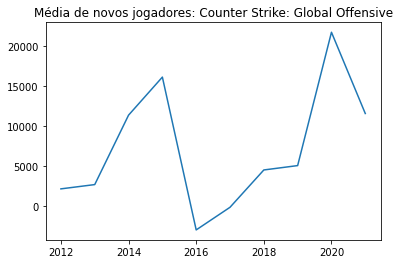

In [ ]:
cyl_grouped = game_csgo.groupby('year').mean().reset_index()

plt.plot(cyl_grouped.year, cyl_grouped.gain)
plt.title('Média de novos jogadores: Counter Strike: Global Offensive')
plt.show()

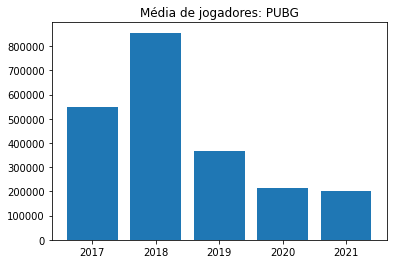

In [ ]:
cyl_grouped = game_pubg.groupby('year').mean().reset_index()

plt.bar(cyl_grouped['year'], cyl_grouped['avg'])
plt.title('Média de jogadores: PUBG')
plt.show()

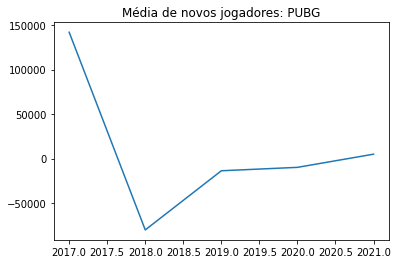

In [ ]:
cyl_grouped = game_pubg.groupby('year').mean().reset_index()

plt.plot(cyl_grouped.year, cyl_grouped.gain)
plt.title('Média de novos jogadores: PUBG')
plt.show()


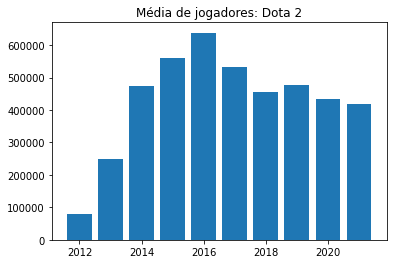

In [ ]:
cyl_grouped = game_dota2.groupby('year').mean().reset_index()

plt.bar(cyl_grouped['year'], cyl_grouped['avg'])
plt.title('Média de jogadores: Dota 2')
plt.show()

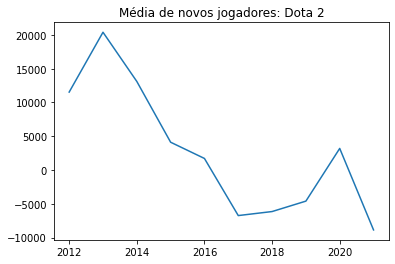

In [ ]:
cyl_grouped = game_dota2.groupby('year').mean().reset_index()

plt.plot(cyl_grouped.year, cyl_grouped.gain)
plt.title('Média de novos jogadores: Dota 2')
plt.show()

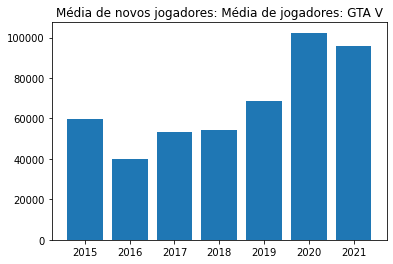

In [ ]:
cyl_grouped = game_gtav.groupby('year').mean().reset_index()

plt.bar(cyl_grouped['year'], cyl_grouped['avg'])
plt.title('Média de novos jogadores: Média de jogadores: GTA V')
plt.show()

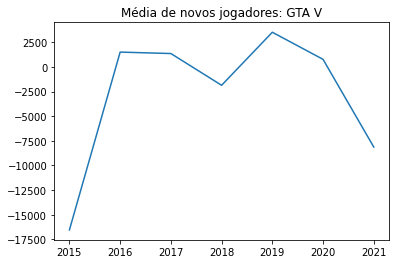

In [ ]:
cyl_grouped = game_gtav.groupby('year').mean().reset_index()

plt.plot(cyl_grouped.year, cyl_grouped.gain)
plt.title('Média de novos jogadores: GTA V')
plt.show()

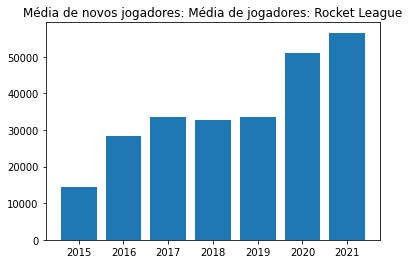

In [ ]:
cyl_grouped = game_RL.groupby('year').mean().reset_index()

plt.bar(cyl_grouped['year'], cyl_grouped['avg'])
plt.title('Média de novos jogadores: Média de jogadores: Rocket League')
plt.show()

Text(0.5, 1.0, 'Média de novos jogadores: Rocket League')

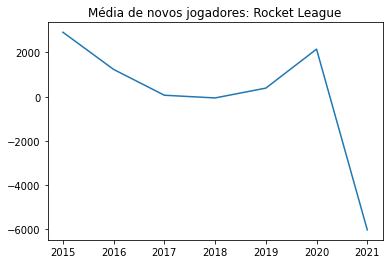

In [ ]:
cyl_grouped = game_RL.groupby('year').mean().reset_index()

plt.plot(cyl_grouped.year, cyl_grouped.gain, label="Ganhos")
plt.title('Média de novos jogadores: Rocket League')


# **Ano a Ano**

Os gráficos ano a ano representam uma comparação da média de jogadores ano a ano. Lembrando que os jogos representados nesses gráficos são os mesmo que foram separados na parte "Separando dados para melhor analise"



In [ ]:
jogos = steam_games_clean.query('((gamename == "Rocket League") | (gamename == "CSGO") | (gamename == "PUBG") | (gamename == "Dota 2") | (gamename == "GTAV"))')
jogos_2012 = jogos.query('year == 2012').sort_values(by='month')
jogos_2013 = jogos.query('year == 2013').sort_values(by='month')
jogos_2014 = jogos.query('year == 2014').sort_values(by='month')
jogos_2015 = jogos.query('year == 2015').sort_values(by='month')
jogos_2016 = jogos.query('year == 2016').sort_values(by='month')
jogos_2017 = jogos.query('year == 2017').sort_values(by='month')
jogos_2018 = jogos.query('year == 2018').sort_values(by='month')
jogos_2019 = jogos.query('year == 2019').sort_values(by='month')
jogos_2020 = jogos.query('year == 2020').sort_values(by='month')
jogos_2021 = jogos.query('year == 2021').sort_values(by='month')

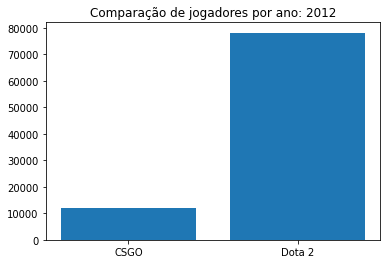

In [ ]:
cyl_grouped = jogos_2012.groupby('gamename').mean().reset_index()
plt.bar(cyl_grouped['gamename'], cyl_grouped['avg'])
plt.title('Comparação de jogadores por ano: 2012')
plt.show()

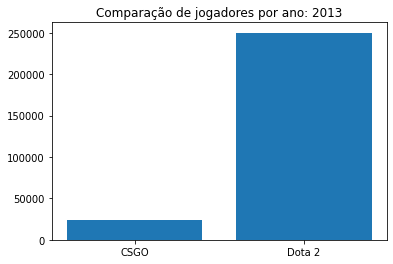

In [ ]:
cyl_grouped = jogos_2013.groupby('gamename').mean().reset_index()
plt.bar(cyl_grouped['gamename'], cyl_grouped['avg'])
plt.title('Comparação de jogadores por ano: 2013')
plt.show()

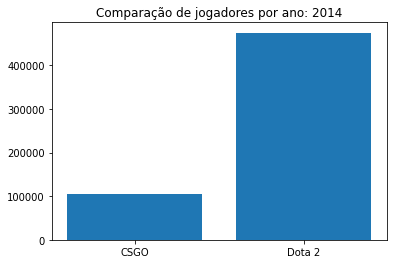

In [ ]:
cyl_grouped = jogos_2014.groupby('gamename').mean().reset_index()
plt.bar(cyl_grouped['gamename'], cyl_grouped['avg'])
plt.title('Comparação de jogadores por ano: 2014')
plt.show()

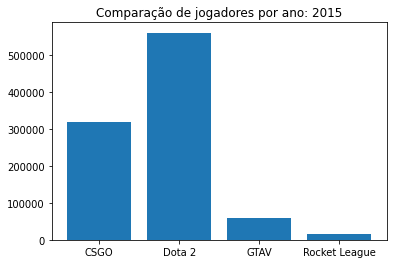

In [ ]:
cyl_grouped = jogos_2015.groupby('gamename').mean().reset_index()
plt.bar(cyl_grouped['gamename'], cyl_grouped['avg'])
plt.title('Comparação de jogadores por ano: 2015')
plt.show()

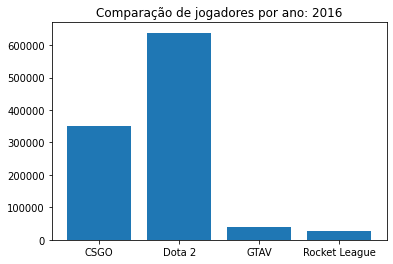

In [ ]:
cyl_grouped = jogos_2016.groupby('gamename').mean().reset_index()
plt.bar(cyl_grouped['gamename'], cyl_grouped['avg'])
plt.title('Comparação de jogadores por ano: 2016')
plt.show()

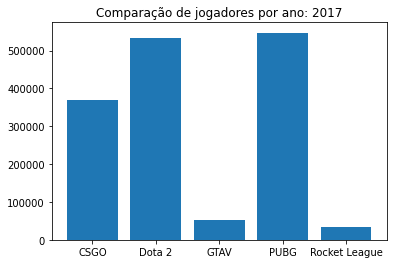

In [ ]:
cyl_grouped = jogos_2017.groupby('gamename').mean().reset_index()
plt.bar(cyl_grouped['gamename'], cyl_grouped['avg'])
plt.title('Comparação de jogadores por ano: 2017')
plt.show()

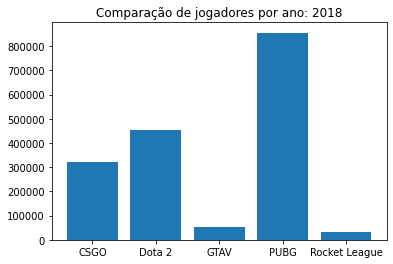

In [ ]:
cyl_grouped = jogos_2018.groupby('gamename').mean().reset_index()
plt.bar(cyl_grouped['gamename'], cyl_grouped['avg'])
plt.title('Comparação de jogadores por ano: 2018')
plt.show()

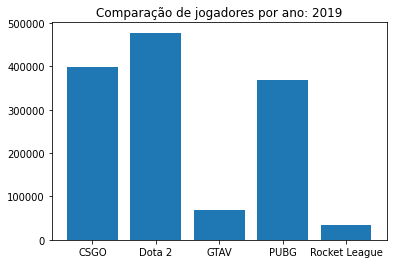

In [ ]:
cyl_grouped = jogos_2019.groupby('gamename').mean().reset_index()
plt.bar(cyl_grouped['gamename'], cyl_grouped['avg'])
plt.title('Comparação de jogadores por ano: 2019')
plt.show()

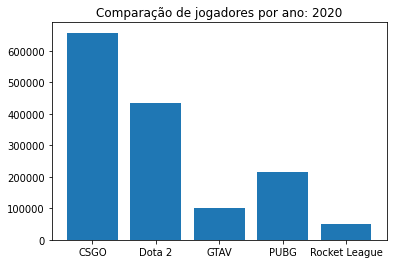

In [ ]:
cyl_grouped = jogos_2020.groupby('gamename').mean().reset_index()
plt.bar(cyl_grouped['gamename'], cyl_grouped['avg'])
plt.title('Comparação de jogadores por ano: 2020')
plt.show()

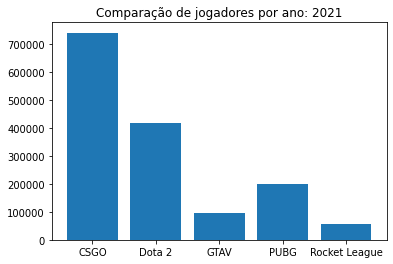

In [ ]:
cyl_grouped = jogos_2021.groupby('gamename').mean().reset_index()
plt.bar(cyl_grouped['gamename'], cyl_grouped['avg'])
plt.title('Comparação de jogadores por ano: 2021')
plt.show()

# **Separando Treino e Teste**

Aqui foram separados os dados ano a ano dos 5 jogos determinado anteriormente para que seja feita logo em seguida a a parte do treinamento e teste. As massas foram separada ao meio, tornando assim 50% para treino e o outros 50% para teste



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X = jogos_2017.drop('gamename', axis=1)
X = X.drop('month', axis=1)
X = X.drop('year', axis=1)
X = X.drop('peak', axis=1)

y = jogos_2017.gamename

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 1/2)

# **Treinando scikit-learn (Classificação)**

Treinamento do dataset para saber qual é o jogo baseado na sua média de jogadores mensais e seus ganhos/perdas de jogadores. Vale ressaltar, que a massa que está sendo testada abaixo está referida ao ano de 2017

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
knn.predict([[30000,-2000]])

array(['Rocket League'], dtype=object)

#**Verificando o desempenho do estimador do scikit-learn no conjunto de teste**

Verificação o desempenho do scikit-learn medindo o mesmo na forma decimal, onde 1.0 se refere a 100%, 0.5 50% e 0.0 como 0%. Vale ressaltar, que a massa que está sendo testada abaixo está referida ao ano de 2017

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_train, y_train)

accuracy_score(y_test, knn2.predict(X_test))

0.8620689655172413

# **Testando e Treinando!**

Basicamente um treino e teste como vimos nos ultimos dois tópicos, divididos ao logo dos anos de 2018, 2019 e 2020

# **2018**

In [ ]:
X = jogos_2018.drop('gamename', axis=1)
X = X.drop('month', axis=1)
X = X.drop('year', axis=1)
X = X.drop('peak', axis=1)

y = jogos_2018.gamename

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 1/2)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_train, y_train)

accuracy_score(y_test, knn2.predict(X_test))

0.9333333333333333

# **2019**

In [ ]:
X = jogos_2019.drop('gamename', axis=1)
X = X.drop('month', axis=1)
X = X.drop('year', axis=1)
X = X.drop('peak', axis=1)

y = jogos_2019.gamename

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 1/2)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_train, y_train)

accuracy_score(y_test, knn2.predict(X_test))

0.8333333333333334

# **2020**

In [ ]:
X = jogos_2020.drop('gamename', axis=1)
X = X.drop('month', axis=1)
X = X.drop('year', axis=1)
X = X.drop('peak', axis=1)

y = jogos_2020.gamename

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 1/2)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_train, y_train)

accuracy_score(y_test, knn2.predict(X_test))

0.9



---



# **Dataset utilizado**


> Popularity of games on Steam - Michal Bogacz
(https://www.kaggle.com/michau96/popularity-of-games-on-steam)



# **Orientação**




> Storopoli (2020). Ciência de Dados com Python: pandas, matplotlib, Scikit-Learn, TensorFlow e PyTorch: Ciência de Dados. Retrieved from https://storopoli.io/ciencia-de-dados